<a href="https://colab.research.google.com/github/mariana-0/Proyecto_2/blob/master/Limpieza_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction

## Limpieza y exploración de datos

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Información dataset

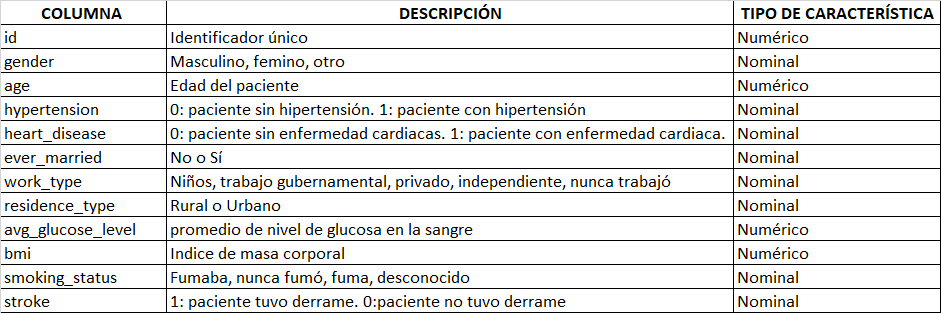

Desconocido en smoking status significa que no había información disponible.

In [164]:
df = pd.read_excel('/content/drive/MyDrive/CodingDojo_DataScience/P2/opcion healthcare-dataset-stroke-data.xlsx')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Identifación valores faltantes.

In [166]:
df.isna().sum().sum()

201

201 datos faltantes en columna bmi.

### Identificación filas duplicadas.

In [167]:
df.duplicated().sum()

0

No hay filas duplicadas

### Columnas innecesarias:

Las columnas que no son útiles la realización de modelos son:

*   Id


In [168]:
df = df.drop(columns=['id'])

In [169]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Idenficicaión de incosistencias en los datos.

In [170]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [171]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [172]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [173]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [174]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [175]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [176]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

No hay datos incosistentes.

In [177]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Data set desbalanceado.

### Incosistencias datos numéricos

In [178]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [179]:
age=df['age']<1
age.sum()

43

No tiene sentido edades decimales, hay 43 valores menores que 1. Cambiaremos todos los valores a números enteros.

In [180]:
df['age']=df['age'].astype(int)

In [181]:
df['age'].describe()

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

### Correlación

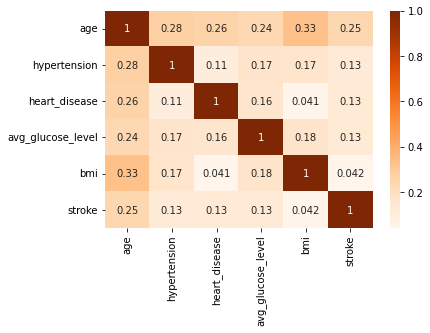

In [182]:
correlacion=df.corr()
import seaborn as sns
sns.heatmap(correlacion, cmap = 'Oranges', annot=True)

No hay datos con correlación significativa.

### Manejos datos faltantes

In [183]:
empty_bmi = df[df['bmi'].isna()]
empty_bmi

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [184]:
bmi_mean = df['bmi'].mean()
df['bmi']=df['bmi'].fillna(bmi_mean)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [186]:
df['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

### Identificación valores atípicos.

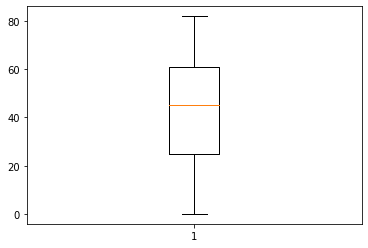

In [187]:
plt.boxplot(df['age'])
plt.show()

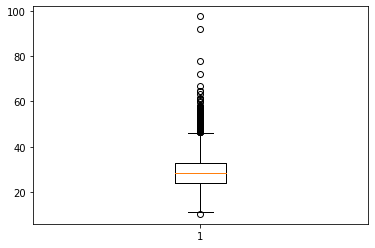

In [189]:
plt.boxplot(df['bmi'])
plt.show()

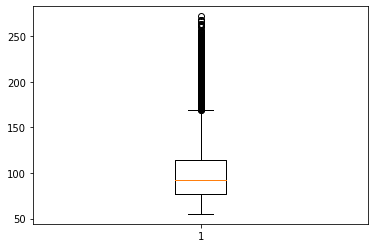

In [190]:
plt.boxplot(df['avg_glucose_level'])
plt.show()

Existencia de datos atípicos en el indice de masa corporal y en el promedio de glucosa en la sangre.

### Visualización.

In [230]:
grafica1=df['gender'].value_counts()
grafica2=df['ever_married'].value_counts()
grafica3=df['hypertension'].value_counts()
grafica4=df['heart_disease'].value_counts()
grafica4

0    4834
1     276
Name: heart_disease, dtype: int64

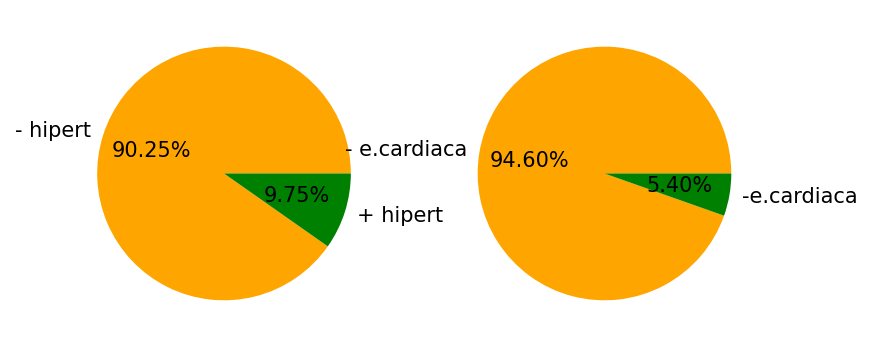

In [234]:
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2) 

ax1.pie(grafica3, autopct='%.2f%%', labels=['- hipert','+ hipert'], colors=['orange','green'])
ax2.pie(grafica4, autopct='%.2f%%', labels=['- e.cardiaca','-e.cardiaca'], colors=['orange','green'])
plt.show()

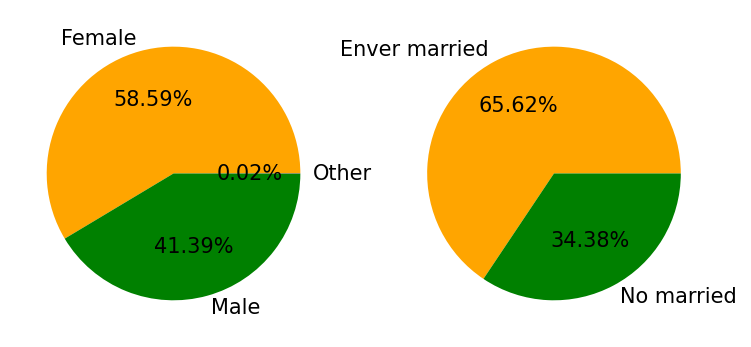

In [233]:
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2) 

ax1.pie(grafica1, autopct='%.2f%%', labels=['Female','Male','Other'], colors=['orange','green','blue'])
ax2.pie(grafica2, autopct='%.2f%%', labels=['Enver married','No married'], colors=['orange','green'])
plt.show()

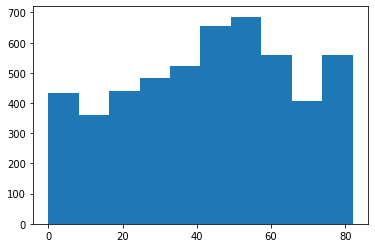

In [225]:
plt.hist(df['age'])
plt.show()

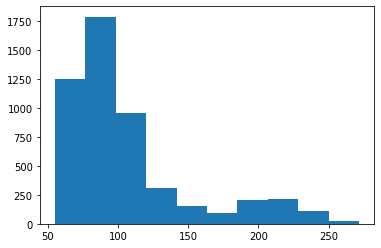

In [226]:
plt.hist(df['avg_glucose_level'])
plt.show()

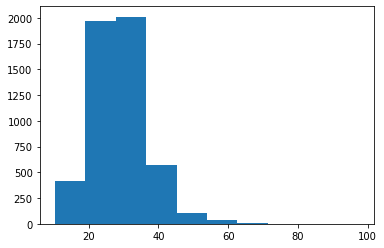

In [227]:
plt.hist(df['bmi'])
plt.show()